In [1]:
# This should be roughly the content of the first code cell
import numpy as np
import random
np.random.seed(1337)
random.seed(1337)

In [2]:
import pandas as pd
import sklearn
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.datasets import load_wine, load_iris,make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot as plt



In [3]:
df1 = pd.read_csv("elections_clean.csv")
df = df1[['democrat', 'county', 'state', 'education', 'religion', 'ethnic_male','ethnic_female']]
#df.drop(columns=['county'], axis = 1, inplace = True)
df.dropna(inplace = True)
df

/var/folders/dz/ffb7x_vj5vl9758_4vqfvj3m0000gn/T/ipykernel_79101/3893859448.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace = True)


,democrat,county,state,education,religion,ethnic_male,ethnic_female
0,0,Sioux County,NE,Educated,CHRISTIAN GENERIC,MULTI MALE RATE,NATIVE AMERICAN FEMALE RATE
1,1,Baltimore city,MD,Educated,OTHER MISC,WHITE MALE RATE,WHITE FEMALE RATE
2,1,Chittenden County,VT,Educated,MAINLINE CHRISTIAN,ASIAN MALE RATE,BLACK FEMALE RATE
3,0,Prince of Wales-Hyder Census Area,AK,Uneducated,OTHER MISC,BLACK MALE RATE,BLACK FEMALE RATE
4,0,St. Johns County,FL,Educated,MAINLINE CHRISTIAN,BLACK MALE RATE,BLACK FEMALE RATE
...,...,...,...,...,...,...,...
3140,0,Clinton County,MO,Educated,CATHOLIC,MULTI MALE RATE,BLACK FEMALE RATE
3141,0,Union County,AR,Uneducated,MAINLINE CHRISTIAN,BLACK MALE RATE,BLACK FEMALE RATE
3142,0,Garfield County,NE,Educated,MAINLINE CHRISTIAN,MULTI MALE RATE,BLACK FEMALE RATE
3143,0,Greene County,IN,Uneducated,MAINLINE CHRISTIAN,MULTI MALE RATE,NATIVE AMERICAN FEMALE RATE


In [4]:
#df.drop(columns=['county', 'state'], axis = 1, inplace = True)

In [5]:
target = 'democrat'
y = df[target]
df.drop([target], axis = 1, inplace = True)
X = pd.get_dummies(df)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

/var/folders/dz/ffb7x_vj5vl9758_4vqfvj3m0000gn/T/ipykernel_79101/3398214840.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop([target], axis = 1, inplace = True)


Accuracy (%) of training: 85.16833484986351 %


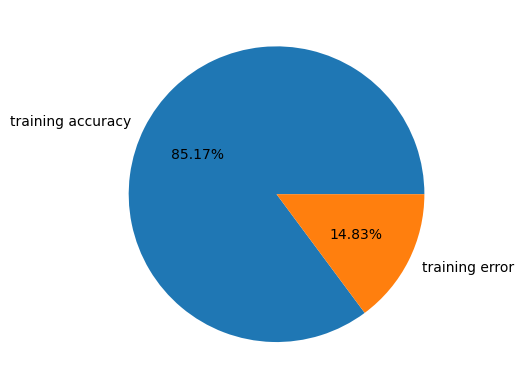

In [6]:

forest = RFC(n_estimators=50, max_depth=3)
forest.fit(X_train, y_train)
predictions = forest.predict(X_train)
print("Accuracy (%) of training:",metrics.accuracy_score(y_train, predictions)*100,"%")
plt.pie([metrics.accuracy_score(y_train, predictions)*100, 100 - metrics.accuracy_score(y_train, predictions)*100],labels = ['training accuracy', 'training error'],autopct = '%0.2f%%')
plt.show()

Accuracy of testing(%): 83.12101910828027 %


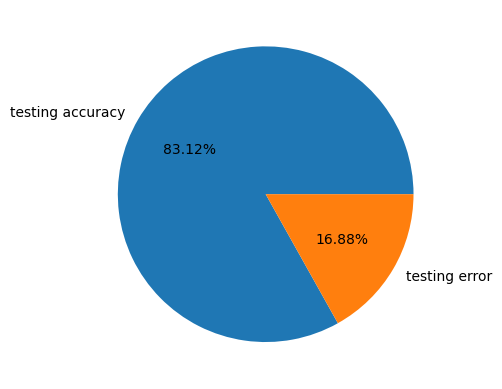

In [7]:
predictions = forest.predict(X_test)
print("Accuracy of testing(%):",metrics.accuracy_score(y_test, predictions)*100,"%")
plt.pie([metrics.accuracy_score(y_test, predictions)*100, 100 - metrics.accuracy_score(y_test, predictions)*100],labels = ['testing accuracy', 'testing error'],autopct = '%0.2f%%')
plt.show()

In [8]:
train_acy = []
test_acy = []
for i in range(1,10):
    m_depth = i
    forest2 = RFC(n_estimators=i, max_depth=3)
    forest2.fit(X_train, y_train)
    predictions = forest2.predict(X_train)
    train_acy.append(forest2.score(X_train, y_train))
    predictions = forest2.predict(X_test)
    test_acy.append(forest2.score(X_test, y_test))
train_acy = np.array(train_acy)
test_acy = np.array(test_acy)
train_error = 1 - train_acy
test_error = 1 - test_acy


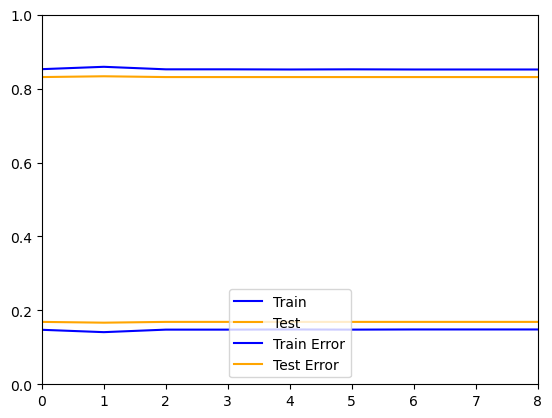

In [9]:
plt.axis([0,8,0,1])
plt.plot(train_acy, 'blue', label = 'Train')
plt.plot(test_acy, 'orange', label = 'Test')
plt.plot(train_error, 'blue', label = 'Train Error')
plt.plot(test_error, 'orange', label = 'Test Error')
leg = plt.legend(loc='lower center')
plt.show()

    Summary.
    In general random forest performs better than a single decision tree. In this example we see that random forest performs better when the decision tree does not remove the COUNTY features (26% accuracy for decision tree, 83% accuracy for random forest). However, after these two features are removed random forest does not perform as well as decision tree (87% accuracy for decision tree and 83% accuracy for random forest).

    In general, random forest is more stable. There are two reasons why random forest performs so consistently. First, it uses the majority voting principle for prediction, which reduces the influence of extreme values on the decision. Second, random forest has strong resistance to overfitting. In this assignment, the decision created by problem2 is typically overfitted, with a train accuracy of 100% but a test accuracy of only 26%.